<a href="https://colab.research.google.com/github/FairyAmp/linear-systems-analysis/blob/main/rotation_portrait_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Phase Portrait of Linear System

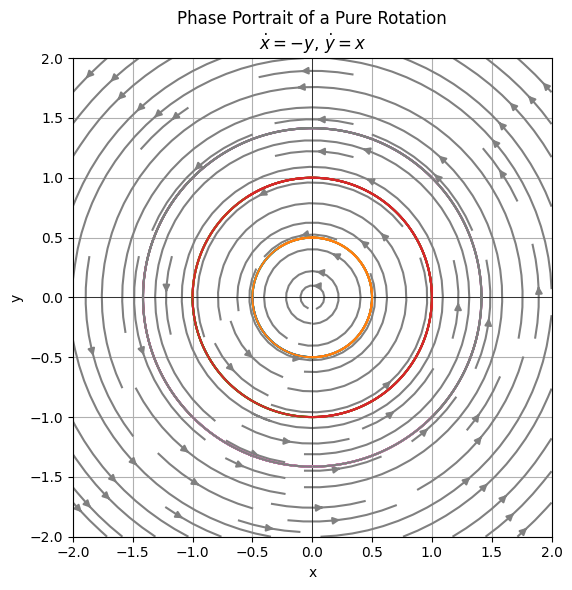

In [1]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Define the linear system: rotation matrix
def system(X, t):
    x, y = X
    dxdt = -y
    dydt = x
    return [dxdt, dydt]

# Create a grid of points in phase space
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)
U = -Y
V = X

# Time points for integration
t = np.linspace(0, 10, 300)

# Initial conditions to plot trajectories
initial_conditions = [
    [1, 0], [0, 1], [-1, 0], [0, -1],
    [1, 1], [-1, 1], [-1, -1], [1, -1],
    [0.5, 0], [0, 0.5], [-0.5, 0], [0, -0.5]
]

# Plot phase portrait
fig, ax = plt.subplots(figsize=(6, 6))
ax.streamplot(X, Y, U, V, color='gray', density=1)
ax.set_title("Phase Portrait of a Pure Rotation\n$\\dot{x} = -y$, $\\dot{y} = x$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Plot trajectories from different initial conditions
for x0 in initial_conditions:
    traj_x = x0[0]*np.cos(t) - x0[1]*np.sin(t)
    traj_y = x0[0]*np.sin(t) + x0[1]*np.cos(t)
    ax.plot(traj_x, traj_y)

ax.set_aspect('equal')
plt.grid(True)
plt.tight_layout()
plt.show()


# Fully linear algebra based

Phase Portrait for the rotation system, using the matrix exponential approach.

The operator (rotation matrix) is $A = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}$.

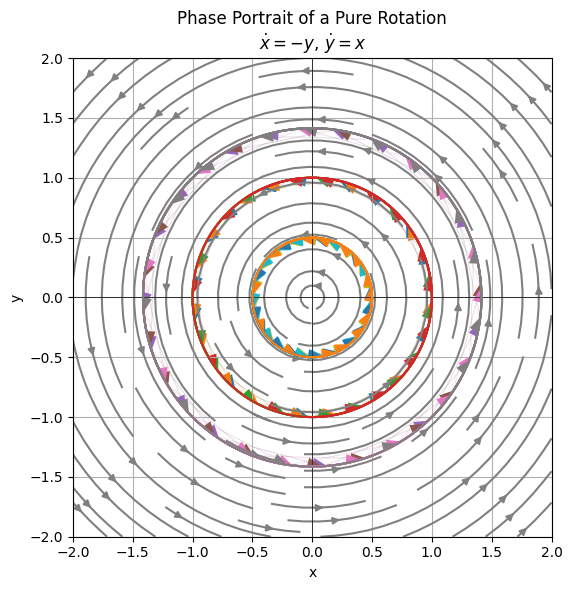

In [4]:
# --- 1. Define the rotation system matrix ---
A = np.array([[0, -1],
              [1,  0]])

# --- 2. Create a grid for the vector field ---
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)
U = -Y
V = X

# --- 3. Time points ---
t = np.linspace(0, 10, 300)

# --- 4. Initial conditions ---
initial_conditions = [
    [1, 0], [0, 1], [-1, 0], [0, -1],
    [1, 1], [-1, 1], [-1, -1], [1, -1],
    [0.5, 0], [0, 0.5], [-0.5, 0], [0, -0.5]
]

# --- 5. Plot phase portrait ---
fig, ax = plt.subplots(figsize=(6, 6))

# Streamplot for the vector field
ax.streamplot(X, Y, U, V, color='gray', density=1)

# Axes and labels
ax.set_title("Phase Portrait of a Pure Rotation\n$\\dot{x} = -y$, $\\dot{y} = x$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# --- 6. Plot trajectories using the matrix exponential ---
colors = plt.cm.tab10.colors  # 10 distinct colors for trajectories

for idx, x0 in enumerate(initial_conditions):
    sol = np.array([expm(A * ti) @ x0 for ti in t])
    color = colors[idx % len(colors)]
    ax.plot(sol[:, 0], sol[:, 1], lw=1.5, color=color)

    # Add small arrows along the trajectory matching line color
    skip = 20
    for i in range(0, len(t)-skip, skip):
        dx = sol[i+skip, 0] - sol[i, 0]
        dy = sol[i+skip, 1] - sol[i, 1]
        ax.arrow(sol[i, 0], sol[i, 1], dx, dy,
                 shape='full', lw=0, length_includes_head=True,
                 head_width=0.08, color=color)

ax.set_aspect('equal')
plt.grid(True)
plt.tight_layout()
plt.show()